<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/LogoUB.jpeg"></img>
<center>
<p>
<h1>Algorísmica Avançada</h1>
<h2>Pràctica 1 - Grafs </h2>
</center>
</p>
</div>

<div class="alert alert-info">
<center>
  <h1>Introducción</h1>
</center>

In [1]:
%matplotlib inline
import networkx as nx
from util import get_metro_graph, draw_metro_graph, get_path_subgraph
from test import test


A lo largo de esta práctica trabajaremos con el grafo generado a partir de la red de metro de Barcelona. En este grafo los nodos representan las estaciones y los ejes las vías que van de una estación a otra. Todos los ejes tienen tres atributos:

* Linea
* Color
* Distancia


In [2]:
G = get_metro_graph('csv/lineasmetro.csv')
print G.get_edge_data(*G.edges()[7])

{'color': 'goldenrod', 'distance': '669130', 'line': 'L4'}


Por otro lado los nodos en su lugar únicamente almacenan (y se indexan) por el nombre de la estación.

In [3]:
print G.nodes()[0]

Camp de l'Arpa


# util.py

En este archivo se os facilitan tres funciones que os permitiran cargar y visualizar la red de metro.
```python
G = get_metro_graph(location)
# Retorna un objeto nx.Graph que corresponde al grafo de la red de metro
# - location: ruta donde esta almacenado el archivo .csv

P = get_path_subgraph(P, path)
# Retorna un objeto tipo nx.Graph que almacena los nodos y los ejes correspondientes al
# camino que le pasamos por parametro
# - P: Grafo original
# - path: Lista de nodos sobre los que queremos crear el subgrafo

draw_metro_graph(G, figsize=(10,10))
# Dibuja el grafo que le pasemos por parametro.
# - G: Grafo de la red de metro
# - figsize: parametro opcional que nos permite definir el tamaño de la figura
```

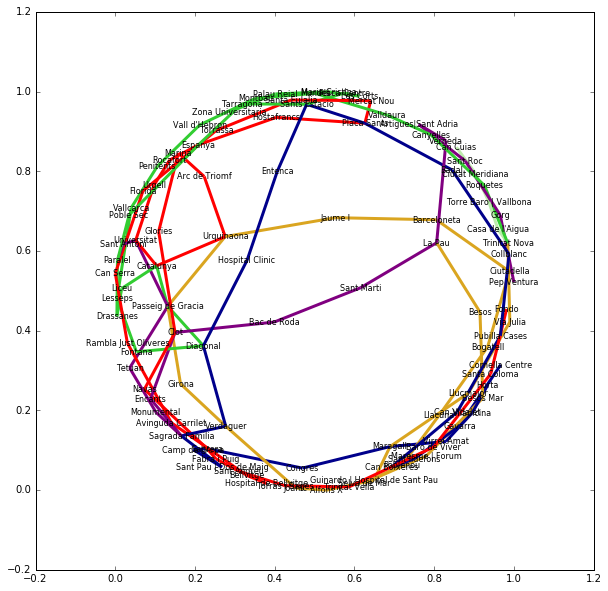

In [4]:
draw_metro_graph(G, figsize=(10,10))

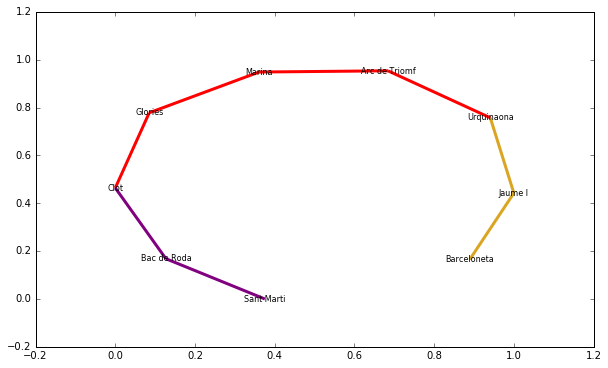

In [5]:
P = get_path_subgraph(G, [
        'Barceloneta',
        'Jaume I', 
        'Urquinaona', 
        'Arc de Triomf', 
        'Marina',
        'Glories',
        'Clot',
        'Bac de Roda',
        'Sant Marti'
    ])

draw_metro_graph(P)

# test.pyc

Este archivo contiene la función __test__ que servirá, a lo largo de la práctica para ir comprobando si los algoritmos implementados funcionan correctamente.

```python
    test(f_name, function)
    # Esta función hace un test de funcional y de forma de los algoritmos implementados.
    # - f_name: nombre de la funcion que queremos probar, a escoger: ['bfs', 'dijkstra', 'dijkstra2']
```

<div class="alert alert-info">
<center>
  <h1>Contenido</h1>
  </center><p>




<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1- Breadth First Search</p></h2>
  
  <p>
  En este primer apartado se propone la implementación del algoritmo _Breadth First Search_. Mediante este algoritmo pretendemos encontrar el camíno mínimo entre dos puntos del grafo.
  </p>
  <p>
  Se pide una implementación iterativa del algoritmo, en la que mediante una queue realizemos una exploración expansiva. Hay que tener en cuenta que la red de metro se construye como un grafo no dirigido, así que es importante controlar el hecho de que se visiten los nodos una sola vez.
  </p>
  
  <p>
  <a href="https://en.wikipedia.org/wiki/Breadth-first_search">Aquí</a> podeis encontrar mas detalles sobre la implementación y características de este algoritmo.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta practica la red de metro) que utilizaremos para buscar el camino. Debe de ser un objeto te tipo _networkx.Graph_.</li>
<li>__origen__: Este parámetro corresponde al indice de un nodo. En este caso, como indexamos los nodos con el nombre de las paradas de Metro, deberá ser un String _(e.g. 'Tetuan')_.</li>
<li>__destino__: El indice del nodo al que queremos llegar.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un diccionario que contiene los siguientes valores
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final __ambos nodos, inicio y final, han de estar incluidos en esta lista__.</li>
<li>__ _'expanded'_ __: El numero de nodos que se han visitado para encontrar la solución.</li>
<ul>

</p>

</div>

In [6]:
def bfs(G, origen, destino):
    path = [] 
    path.append((origen,[origen])) #metemos el origen en la lista
    visitados = []
    
    while path: #mientras haya un elemento en la lista
        (now, final) = path.pop(0) #cojeremos el primer elemento de la lista
        if destino == now: #si este es el destino hemos acabado
            return {'path' : final,'expanded' : len(visitados)}
        if not now in visitados: #si no lo es, y este nodo no esta en visitados
            visitados.append(now) #añadimos el nodo a la lista de visitados
            for i in G.neighbors(now): #y metemos en la lista todos los vecinos.
                path.append((i,final+[i]))
#Siendo N el numero de nodos: O(N²)


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Test </h3></p> </center> </div>

In [7]:
test('bfs', bfs)

== Test v0.3 ==
#1. Test de forma [OK]
#2. Test funcional
* Expanded [OK]
* Path [OK]


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios </h3></p> </center> </div>

### _(En esta sección se os propone explicar como habeis realizado la implementación y cual es la complejidad detallada del algoritmo. Podéis contestar en este mismo bloque)_

<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>2- Dijkstra</p></h2>
  
  <p>
 En esta segunda parte de la práctica se propone que hagáis dos implementaciones del algoritmo <a href="https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm">Dijkstra</a>. 
 <ul><li>
 **dijkstra1:** La primera consiste en el algoritmo común en el que tendremos en cuenta las distancias definidas en los edges. 
 </li><li>
 **dijkstra2:** La segunda implementación es simplemente una ampliación del primer algoritmo en el que añadiremos una penalización por cambio de línea.</li>
 </ul>
</p>
<h3> Ejemplo _dijkstra2_</h3>
<p>
Para ilustrar lo que se pide en la práctica veamos como se calcularía el valor de **C** y **D** en el siguiente gráfico:
</p>


<p><center><img src='img/e1.png'></img></center></p>


<p>
<ul><li>
**[C]** Calculamos V(B) como V(A) + d([A,B]), calculamos V(C) como V(B) + d([B,C]), ya hemos acabado.
</li>
<li>
**[D]** Calculamos V(B) como V(A) + d([A,B]), calculamos V(D) como V(B) + d([B,D]), como [A,B] es linea azul y [B,D] es linea verde, añadimos una penalización por el transbordo a la que llamamos **P**. Por lo tanto, al final obtenemos que V(D) = V(B) + d([B,C]) + P
</li>
</ul>

<br>
-**V(X)**: Valor de X
<br>
-**d([X,Y])**: Distancia de X a Y
<br>
-**P**: Penalización por transbordo

</p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta practica la red de metro) que utilizaremos para buscar el camino. Debe de ser un objeto te tipo _networkx.Graph_.</li>
<li>__origen__: Este parámetro corresponde al indice de un nodo. En este caso, como indexamos los nodos con el nombre de las paradas de Metro, deberá ser un String _(e.g. 'Tetuan')_.</li>
<li>__destino__: El indice del nodo al que queremos llegar.</li>
<li>__infinity=*(int)*__: Parámetro opcional en el que definimos que número nos va bien para utilizar como infinito en el momento de inicializar los pesos de los nodos.</li>
<li>__penalty=*(int)*__: (_Solo necesario para dijkstra2)_ Es un numero entero que corresponde a la penalización que aplicamos al valor de un nodo cuando hay cambio de línea.
</ul>
<br>
<h3>OUTPUT</h3>
El output de una función es un diccionario que contiene los siguientes valores
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final __ambos nodos, inicio y final, han de estar incluidos en esta lista__.</li>
<li>__ _'expanded'_ __: El número de nodos que se han visitado para encontrar la solución.</li>
<li>__ _'distance'_ __: La distancia del camino mínimo desde el origen hasta el destino (es decir, el valor del nodo destino).
<ul>

</p>
</div>


In [8]:
def dijkstra(G, origen, destino, penalty=5000000, infinity=99999999999):
    path = []
    path.append((origen,[origen],0))
    #añadimos a la cola ya los datos del origen    
    posible = ('',[],0)
    visitados = []
    costeProv = infinity #inicializamos el valor provisional del coste con el infinito que nos dais
    
    while path:#mientras haya un elemento en el camino (recorrerá todos los nodos del grafo)
        for p in range(len(path)-1): # en cada iteración ordena la cola de menor a mayor coste#cojemos los datos del primer elemento de nuestra cola, que será el de menos coste

            if p ==0:
                p+=1
            if (path[p][2] < path[p-1][2]):
                prov = path[p-1]
                path[p-1] = path[p]
                path[p] = prov
        nodo,camino,cost = path.pop(0)#cojemos los datos del primer elemento de nuestra cola, que será el de menos coste#aqui comprobbamos si hemos llegado al final.
        if nodo == destino:#aqui comprobbamos si hemos llegado al final.
            if cost<costeProv:#si hemos llegado al final:
                #substituimos los datos provisionales
                posible = (nodo,camino,cost)
                #le damos un nuevo valor al coste provisional
                costeProv = cost
                #(tengo en cuenta que puede llegar al final uno con un coste menor)
        elif not nodo in visitados:#si aun no es el final:
            visitados.append(nodo)
            k = G.neighbors(nodo)#cojemos los vecinos
            #Y los ordenamos, quiero recordarte que, se que esto no tiene mucho sentido y aumenta la complejidad
            #pero despues de muchos tests, el test de este algoritmo sin este sort me da KO aunque la solución sea
            #la misma, así que parece ser que lo necesitamos.#por cada uno de los vecinos
            for i in range(len(k)-1):
                if i == 0:
                    i = i+1
                if ((int(G[nodo][k[i]]['distance'])) < (int(G[nodo][k[i-1]]['distance']))):
                    prov = k[i-1]
                    k[i-1] = k[i]
                    k[i] = prov
            for u in k:#por cada uno de los vecinos
                path.append((u,camino+[u],cost + (int(G[nodo][u]['distance'])))) #simplemente lo metemos en la cola
                            
    return {'path': posible[1] ,'expanded': len(visitados),'distance':posible[2]}
                
dijkstra(G, 'Universitat', 'Sagrera')  

#Siendo N el numero de nodos la complejidad es de: O(N²)
#Es O(N*(N+N+N)), lo considero O(N²)

{'distance': 5229515,
 'expanded': 97,
 'path': ['Universitat',
  'Passeig de Gracia',
  'Girona',
  'Verdaguer',
  'Sagrada Familia',
  'Sant Pau | Dos de Maig',
  "Camp de l'Arpa",
  'Sagrera']}

In [10]:
def dijkstra2(G, origen, destino, penalty=5000000, infinity=99999999999):
    path = []
    path.append((origen,[origen],0,0)) #añadimos a la cola ya los datos del origen
    
    posible = ('',[],0,0) 
    visitados = []
    costeProv = infinity #inicializamos el valor provisional del coste con el infinito que nos dais
    flagLinea = False
    
    while path: #mientras haya un elemento en el camino (recorrerá todos los nodos del grafo)
        for p in range(len(path)-1): # en cada iteración ordena la cola de menor a mayor coste
            if p ==0:
                p+=1
            if (path[p][2] < path[p-1][2]):
                prov = path[p-1]
                path[p-1] = path[p]
                path[p] = prov
        nodo,camino,cost,linea = path.pop(0) #cojemos los datos del primer elemento de nuestra cola, que será el de menos coste
        if nodo == destino: #aqui comprobbamos si hemos llegado al final.
            if cost<costeProv: #si hemos llegado al final:
                #substituimos los datos provisionales
                posible = (nodo,camino,cost,linea)
                #le damos un nuevo valor al coste provisional
                costeProv = cost
                #(tengo en cuenta que puede llegar al final uno con un coste menor)
        elif not nodo in visitados: #si aun no es el final:
            visitados.append(nodo) #añadimos el nodo a visitados
            k = G.neighbors(nodo) #cojemos los vecinos
            #Y los ordenamos, quiero recordarte que, se que esto no tiene mucho sentido y aumenta la complejidad
            #pero despues de muchos tests, el test de este algoritmo sin este sort me da KO aunque la solución sea
            #la misma, así que parece ser que lo necesitamos.
            for i in range(len(k)-1):
                if i == 0:
                    i = i+1
                if ((int(G[nodo][k[i]]['distance'])) < (int(G[nodo][k[i-1]]['distance']))):
                    prov = k[i-1]
                    k[i-1] = k[i]
                    k[i] = prov
            for u in k: #por cada uno de los vecinos
                if (G.get_edge_data(nodo,u)['line'] != linea): #si hay un cambio de linea, tenemos que añadir la penalización
                    if not flagLinea: #pero en el caso inicial no le hemos dicho el valor de la linea en la que esta al principio
                        #por lo tanto utilizo un booleano, este se inicializa como false, y aqui se añade la linea del primer
                        #paso, sin tener que pagar el coste de la penalización.
                        flagLinea= True
                        path.append((u,camino+[u],cost + (int(G[nodo][u]['distance'])),G.get_edge_data(nodo,u)['line']))

                    else: #si el booleano es true, simplemente se añade el vecino con la penalización a la cola
                        path.append((u,camino+[u],cost + penalty + (int(G[nodo][u]['distance'])),G.get_edge_data(nodo,u)['line']))

                else:#si no hay cambio de linea simplemente se añade a la cola el vecino
                    path.append((u,camino+[u],cost + (int(G[nodo][u]['distance'])),G.get_edge_data(nodo,u)['line']))
                    if not flagLinea: #y se cambia el estado del booleano.
                        flagLinea = True                            
    return {'path': posible[1] ,'expanded': len(visitados),'distance':posible[2]}
                
dijkstra2(G, 'Horta', 'Mundet')    

#Siendo N el numero de nodos la complejidad es de: O(N²)
#Es O(N*(N+N+N)), lo considero O(N²)

{'distance': 17050021,
 'expanded': 104,
 'path': ['Horta',
  'Vilapicina',
  'Virrei Amat',
  'Maragall',
  'Congres',
  'Sagrera',
  "Camp de l'Arpa",
  'Sant Pau | Dos de Maig',
  'Sagrada Familia',
  'Verdaguer',
  'Diagonal',
  'Fontana',
  'Lesseps',
  'Vallcarca',
  'Penitents',
  "Vall d'Hebron",
  'Montbau',
  'Mundet']}

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Test </h3></p> </center> </div>

In [11]:
test('dijkstra', dijkstra)

== Test v0.3 ==
#1. Test de forma [OK]
#2. Test funcional [OK]


In [12]:
test('dijkstra2', dijkstra2)

== Test v0.3 ==
#1. Test de forma [OK]
#2. Test funcional [OK]


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios </h3></p> </center> </div>

### _(En esta sección se os propone explicar como habeis realizado la implementación y cual es la complejidad detallada del algoritmo. Podéis contestar en este mismo bloque)_

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>
<p>
La entrega de esta práctica tiene como fecha límite el **domingo, 13 de noviembre de 2016 a las 23:55**. En el campus virtual deberéis subir este fichero con las funciones implementadas y la secciones de comentarios debidamente rellenadas. Si queréis también podéis añadir tests extras que den soporte a los comentarios realizados.
</p>